<a href="https://colab.research.google.com/github/pawngithub/Books-Python/blob/main/project_1_taxi_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
### problem statement find out the fare amount

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [126]:
df=pd.read_csv('https://raw.githubusercontent.com/pawngithub/Datasets/main/TaxiFare.csv')

In [127]:
df.sample()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
28195,41:21.0,7.3,2011-01-07 08:41:21 UTC,-73.98041,40.74248,-73.971435,40.760344,1


In [128]:
df.shape

(50000, 8)

In [129]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


### data visualization

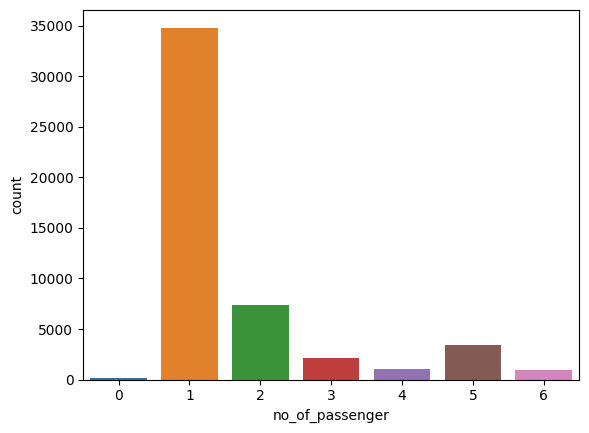

In [131]:
sns.countplot(x='no_of_passenger',data=df)
plt.show()

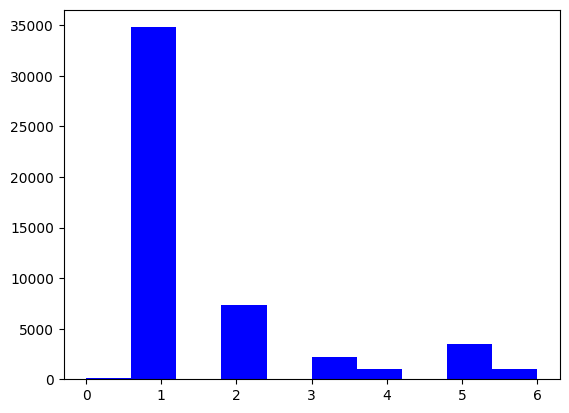

In [132]:
plt.hist(x=df['no_of_passenger'],color="blue")
plt.show()

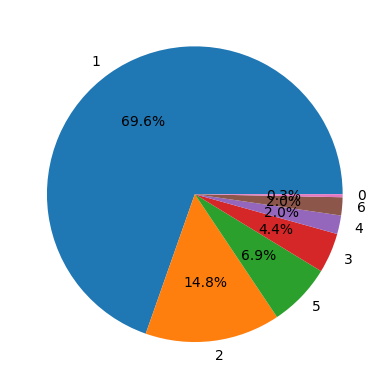

In [133]:
from matplotlib import cm
emb=df['no_of_passenger'].value_counts()
keys=emb.keys().to_list()
counts=emb.tolist()
cs=cm.Set1([2,4,6,8])
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
plt.show()

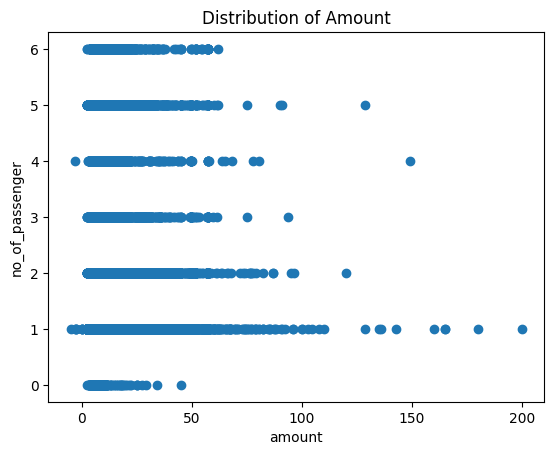

In [134]:
plt.scatter(x='amount', y='no_of_passenger', data=df)
plt.title('Distribution of Amount')
plt.xlabel("amount",fontsize=10)
plt.ylabel('no_of_passenger',fontsize=10)
plt.show()

# Statistics

In [135]:
df.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


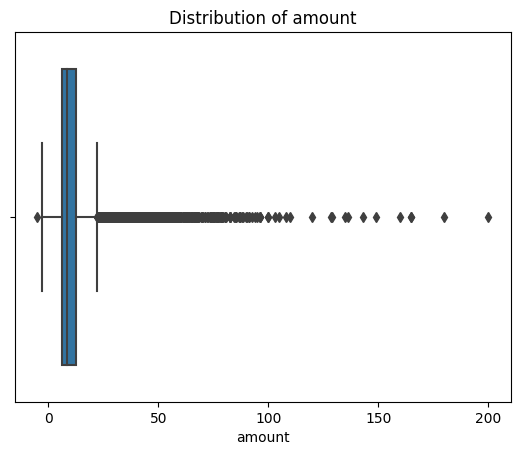

In [136]:
sns.boxplot(x=df['amount'])
plt.title('Distribution of amount')
plt.show()

In [137]:
def remove_outlier(col):
    sorted (col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [138]:
lowamount,highamount=remove_outlier(df["amount"])
df["amount"]=np.where(df["amount"]>highamount,highamount,df["amount"])
df["amount"]=np.where(df["amount"]<lowamount,lowamount,df["amount"])

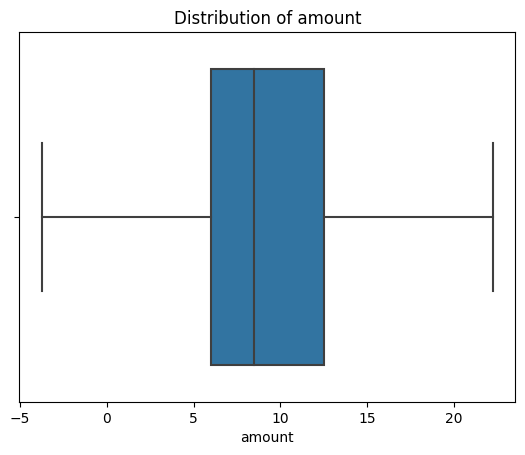

In [139]:
sns.boxplot(x=df['amount'])
plt.title('Distribution of amount')
plt.show()

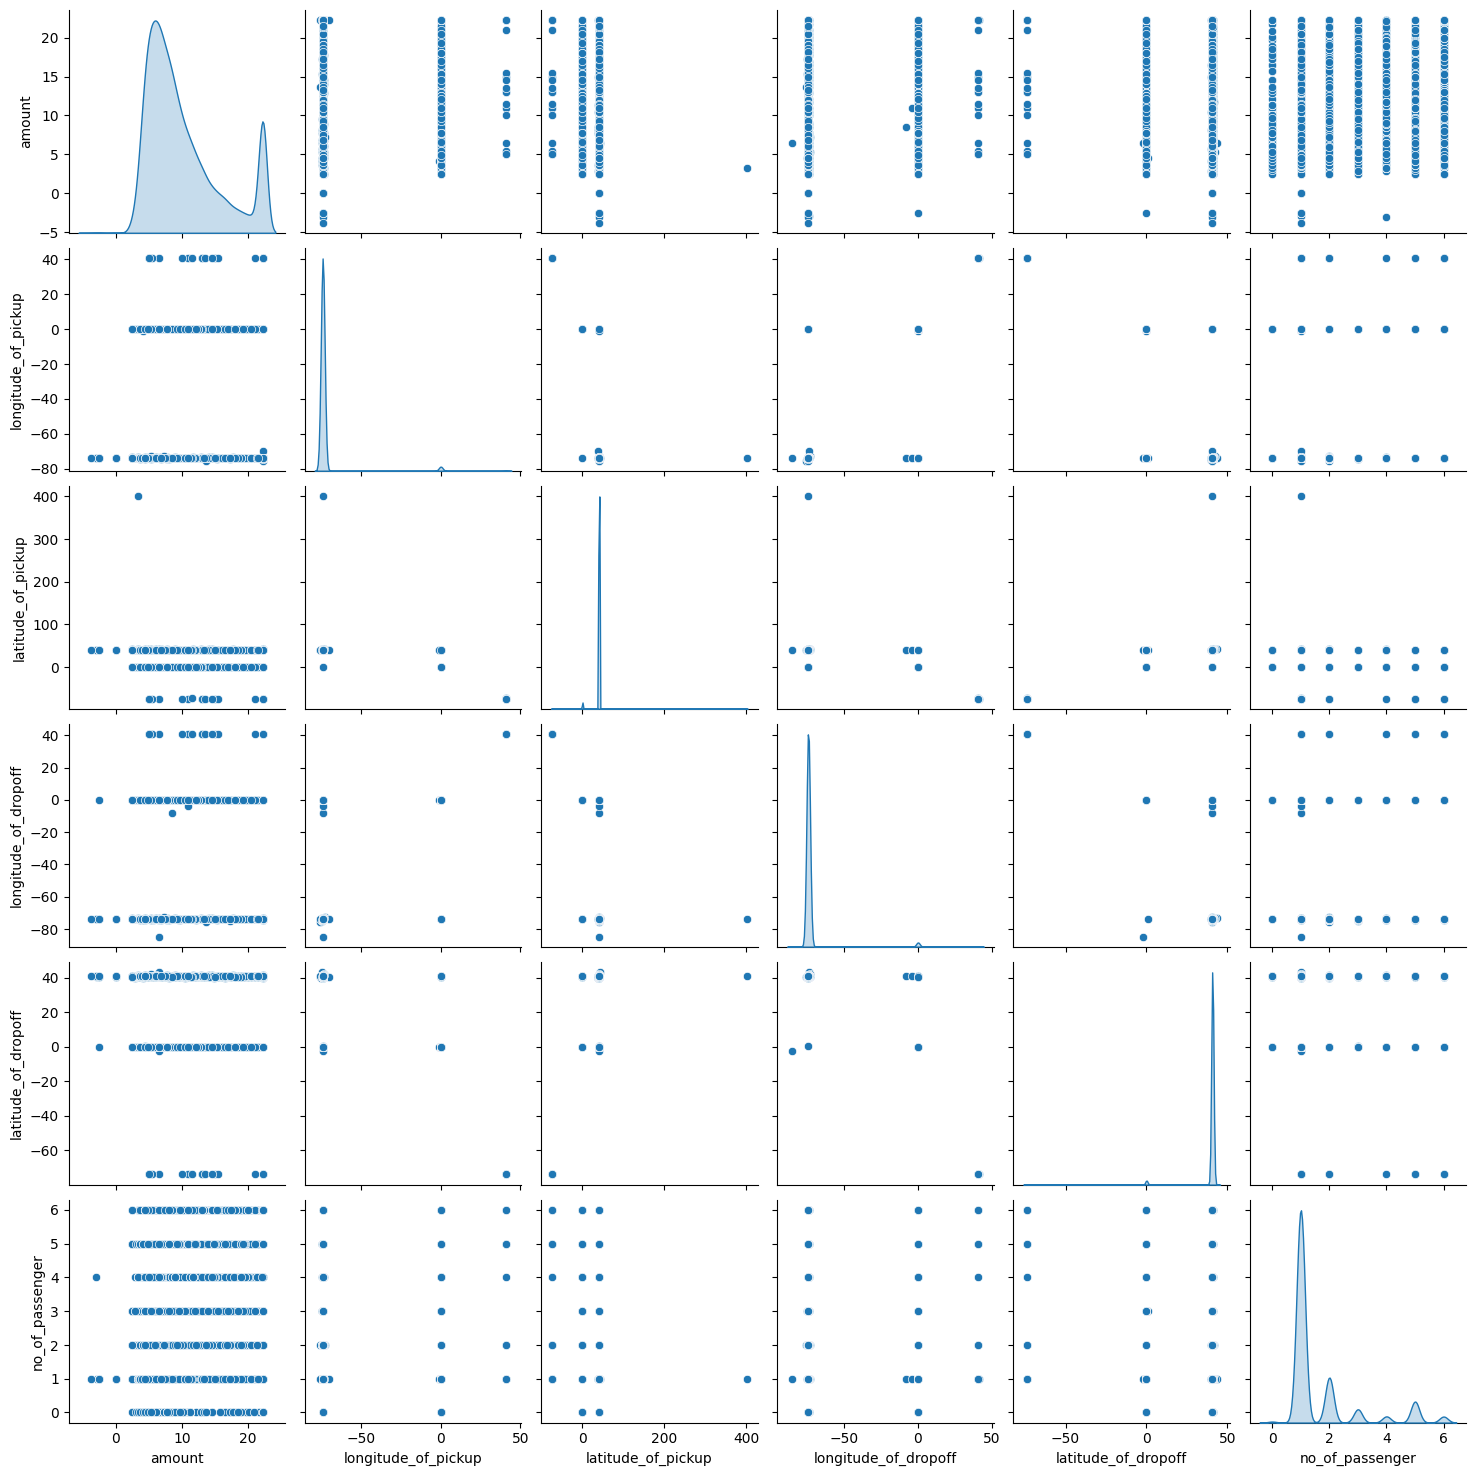

In [140]:
sns.pairplot(df,diag_kind='kde')

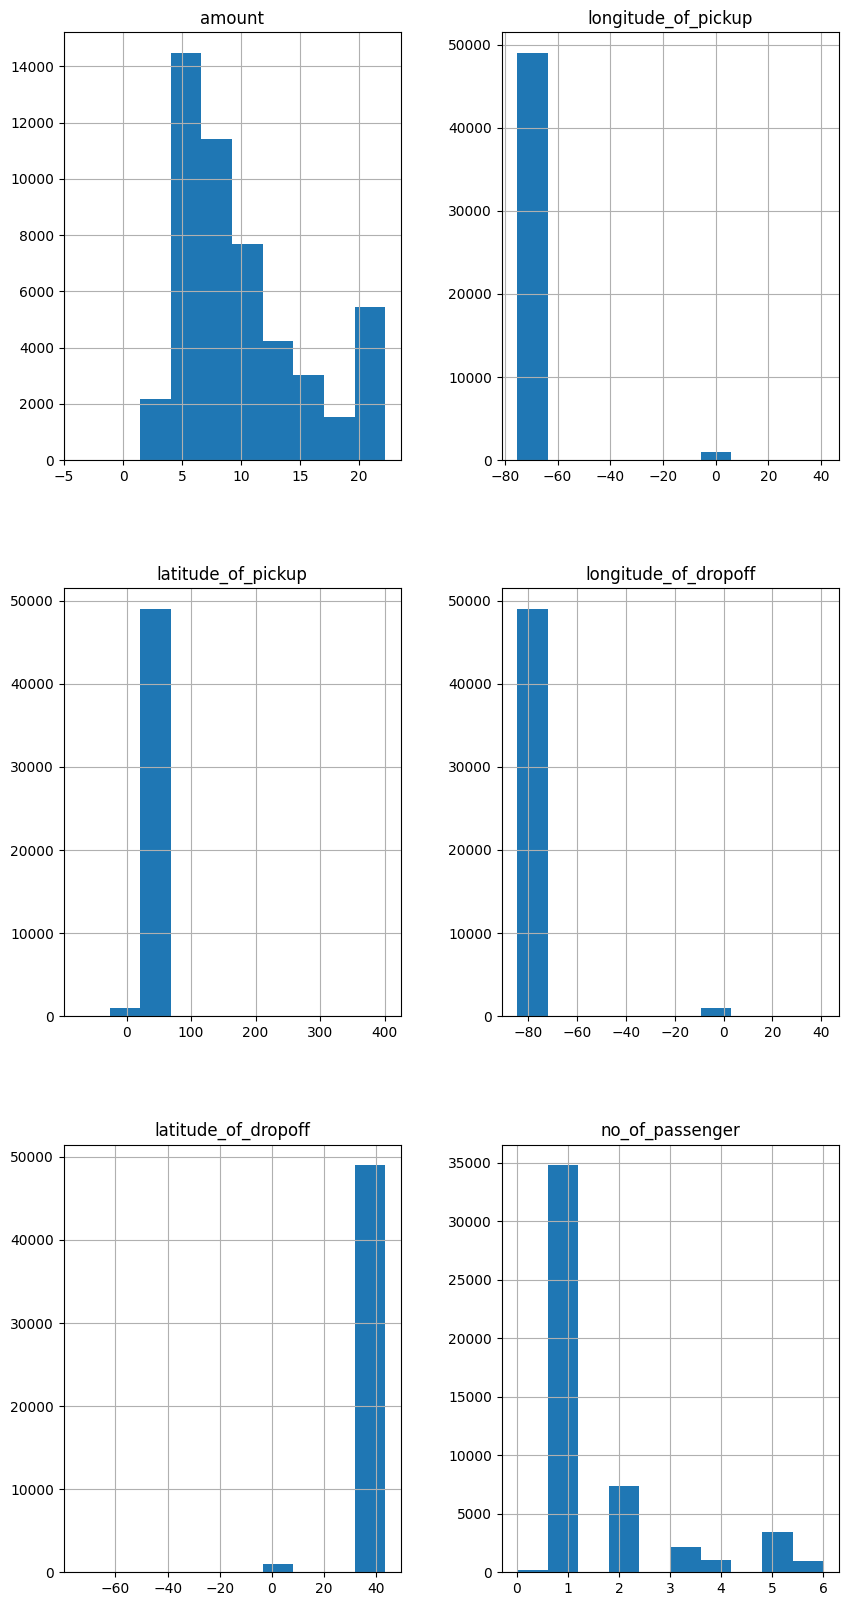

In [141]:
df.hist(figsize=(10,20))
plt.show()

In [142]:
corr=df.corr()
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.001903,-0.004350,-0.001376,-0.000115,0.018793
longitude_of_pickup,0.001903,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.004350,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,-0.001376,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.000115,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.018793,-0.005604,0.003237,-0.004936,0.002958,1.000000


<Axes: >

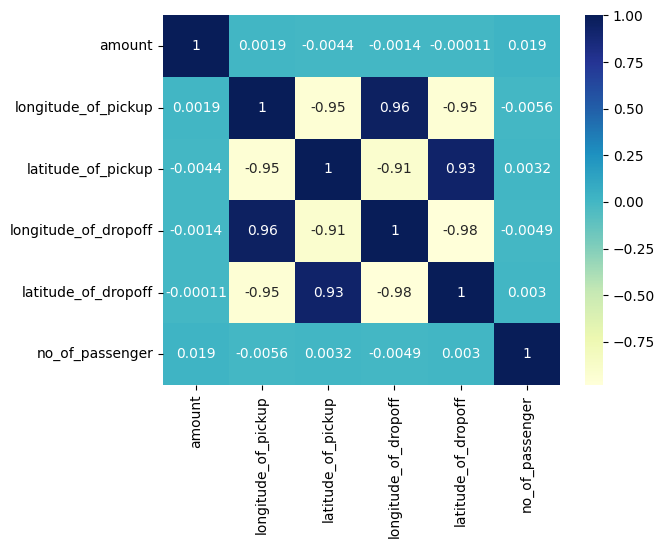

In [143]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")

### data cleaning (Dealing with missing value)

In [144]:
duplicate=df.duplicated()
duplicate.sum()

0

In [145]:
df['longitude_of_pickup']=df['longitude_of_pickup'].replace('0',np.nan)

In [146]:
median1=df['longitude_of_pickup'].median()
median1

-73.98184

In [147]:
df['longitude_of_pickup'].replace(np.nan,median1,inplace=True)

In [148]:
df['latitude_of_pickup']=df['latitude_of_pickup'].replace('0',np.nan)

In [149]:
median2=df['latitude_of_pickup'].median()
median2

40.752678

In [150]:
df['latitude_of_pickup'].replace(np.nan,median2,inplace=True)

In [151]:
df['longitude_of_dropoff']=df['longitude_of_dropoff'].replace('0',np.nan)

In [152]:
median3=df['longitude_of_dropoff'].median()
median3

-73.9800825

In [153]:
df['longitude_of_dropoff'].replace(np.nan,median3,inplace=True)

In [154]:
df['latitude_of_dropoff']=df['latitude_of_dropoff'].replace('0',np.nan)

In [155]:
median4=df['latitude_of_dropoff'].median()
median4

40.7533715

In [156]:
df['longitude_of_dropoff'].replace(np.nan,median4,inplace=True)

In [157]:
df['amount']=df['amount'].replace('NaN',np.nan)

In [158]:
median5=df['amount'].median()
median5

8.5

In [159]:
df['amount'].replace(np.nan,median4,inplace=True)

In [160]:
df['no_of_passenger']=df['no_of_passenger'].replace('0',np.nan)
median5=df['no_of_passenger'].median()
median5

1.0

In [161]:
df['no_of_passenger'].replace(np.nan,median5,inplace=True)

In [162]:
df.drop('date_time_of_pickup',inplace=True,axis=1)

In [163]:
df.sample()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
11951,32:00.0,7.3,-73.986168,40.720625,-74.006182,40.726162,2


In [164]:
duplicate=df.duplicated()
duplicate.sum()

19

# Encoding

In [165]:
df.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [166]:
df=pd.get_dummies(df,columns=['unique_id'])
df=pd.get_dummies(df,columns=['no_of_passenger'])

In [167]:
df.sample(5)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,unique_id_00:00.0,unique_id_00:01.0,unique_id_00:02.0,unique_id_00:03.0,unique_id_00:04.0,...,unique_id_59:57.0,unique_id_59:58.0,unique_id_59:59.0,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
28276,19.3,-73.992404,40.768891,-73.925464,40.862683,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28746,5.7,-73.977928,40.762613,-73.970898,40.761356,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27397,4.1,-73.986845,40.764209,-73.985898,40.762559,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19588,9.0,-73.974187,40.751419,-73.964903,40.772466,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36666,8.9,-74.000058,40.738110,-74.016336,40.705179,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [168]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
                         ...   
no_of_passenger_2         uint8
no_of_passenger_3         uint8
no_of_passenger_4         uint8
no_of_passenger_5         uint8
no_of_passenger_6         uint8
Length: 3609, dtype: object

# Fitting Model

In [169]:
Y=df['amount']
X=df.drop(['amount'],axis=1)

In [170]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [171]:
model1=LinearRegression()

In [172]:
model1.fit(X_train,Y_train)

LinearRegression()

In [173]:
model1.score(X_train,Y_train)

0.10363571476112621

In [174]:
model1.score(X_test,Y_test)

-0.1297462688864799

# Decision Tree Model

In [175]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor(max_depth=10,random_state=50)
model3.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=10, random_state=50)

In [176]:
model3.score(X_train,Y_train)

0.6462214817749299

In [177]:
model3.score(X_test,Y_test)

0.5830048179082078

# Bagging Model

In [178]:
from sklearn.ensemble import BaggingRegressor
model4=BaggingRegressor(n_estimators=50,base_estimator='deprecated')
model4.fit(X_train,Y_train)

BaggingRegressor(n_estimators=50)

In [179]:
model4.score(X_train,Y_train)

0.9611533384089986

In [180]:
model4.score(X_test,Y_test)

0.7559146804625004

# Ada Boosting Model

In [181]:
from sklearn.ensemble import AdaBoostRegressor
model5=AdaBoostRegressor(n_estimators=10)
model5.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=10)

In [182]:
model5.score(X_train,Y_train)

0.3124614528337426

In [183]:
model5.score(X_test,Y_test)

0.2995418227825247